In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
# Define data directories and parameters
train_dir = '/content/drive/MyDrive/Labled_Pumpkin_dataset/Training'
valid_dir = '/content/drive/MyDrive/Labled_Pumpkin_dataset/Validation'
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
image_size = (224, 224)  # ViT often requires square images, adjust as needed

# Use ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow validation images in batches
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Mounted at /content/drive
Found 1050 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


Mounted at /content/drive


In [2]:
!pip install vit-keras
!pip install tensorflow_addons
num_classes=3
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from vit_keras import vit

# Input shape for ViT model (make sure it matches your image size)
input_shape = image_size + (3,)  # RGB images

# Load ViT model from vit_keras library (pip install vit-keras)
model =  vit.vit_l16(
    image_size=image_size,
    activation='softmax',
    pretrained=True,
    include_top=True,
    pretrained_top=True
)

# Freeze the layers of the ViT backbone (optional)
for layer in model.layers[:-3]:
    layer.trainable = False

# Add a Dense layer for classification
output = Dense(num_classes, activation='softmax')(model.layers[-2].output)

# Create a new model combining ViT backbone and Dense layer
model = Model(inputs=model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#model.summary()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


1218991142/1218991142 [==============================] - 5s 0us/step


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  warnings.warn(


In [3]:
epochs = 100

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator
)


Epoch 1/100
33/33 [==============================] - 449s 13s/step - loss: 0.8917 - accuracy: 0.6057 - val_loss: 0.4584 - val_accuracy: 0.8311
Epoch 2/100
33/33 [==============================] - 60s 2s/step - loss: 0.3353 - accuracy: 0.8838 - val_loss: 0.2651 - val_accuracy: 0.9156
Epoch 3/100
33/33 [==============================] - 60s 2s/step - loss: 0.2356 - accuracy: 0.9200 - val_loss: 0.1893 - val_accuracy: 0.9556
Epoch 4/100
33/33 [==============================] - 59s 2s/step - loss: 0.1800 - accuracy: 0.9448 - val_loss: 0.1586 - val_accuracy: 0.9689
Epoch 5/100
33/33 [==============================] - 60s 2s/step - loss: 0.1548 - accuracy: 0.9543 - val_loss: 0.1550 - val_accuracy: 0.9378
Epoch 6/100
33/33 [==============================] - 60s 2s/step - loss: 0.1073 - accuracy: 0.9752 - val_loss: 0.1285 - val_accuracy: 0.9689
Epoch 7/100
33/33 [==============================] - 58s 2s/step - loss: 0.1061 - accuracy: 0.9657 - val_loss: 0.1216 - val_accuracy: 0.9689
Epoch 8/100

In [4]:
model.save("/content/drive/MyDrive/Labled_Pumpkin_dataset/l16my_model.h5")
print("model saved!!!")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


model saved!!!


<ipython-input-5-ec954aec87b9>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


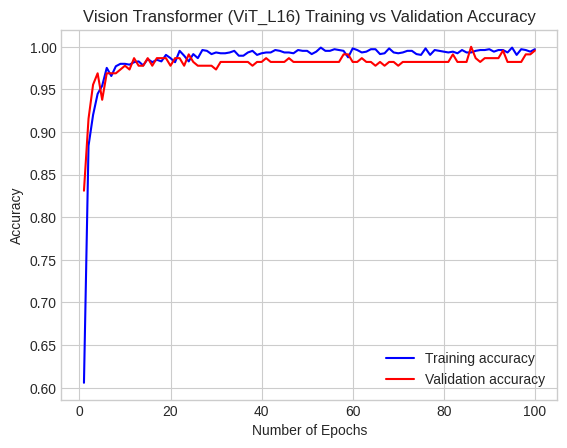

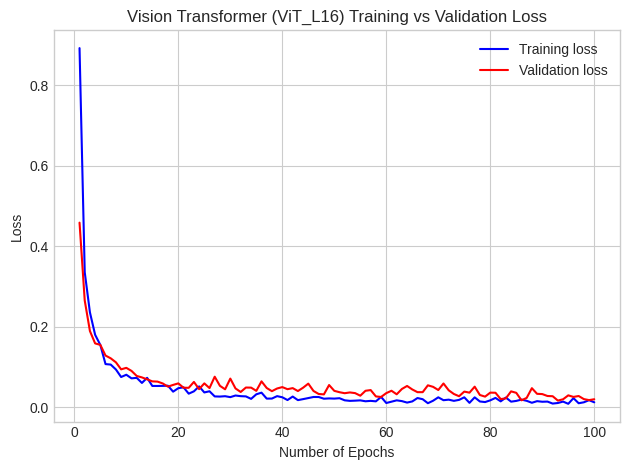

In [5]:
import matplotlib.pyplot as plt

# Example data (replace with your actual training/validation metrics)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.style.use('seaborn-whitegrid')

# Plotting accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Vision Transformer (ViT_L16) Training vs Validation Accuracy')
plt.legend()

# Plotting loss
plt.figure()  # Create a new figure
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Vision Transformer (ViT_L16) Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
import numpy as np
accuracy = np.array(acc)
print(' Training Accuracy of model is      :   '  , accuracy[-1]*100,'%' )

val_accuracy = np.array(val_acc)
print('  Validation  Accuracy of model is      :   '  , val_accuracy[-1]*100,'%' )

t_loss = np.array(loss)
print('training   loss of   model   is     :   ' , t_loss[-1]*100,'%')
val_loss = np.array(val_loss)
print('Validation  loss of   model  is     :   ' , val_loss[-1]*100,'%')

 Training Accuracy of model is      :    99.71428513526917 %
  Validation  Accuracy of model is      :    99.5555579662323 %
training   loss of   model   is     :    1.237060409039259 %
Validation  loss of   model  is     :    1.999378390610218 %


In [7]:
data_dir1 = "/content/drive/MyDrive/Labled_Pumpkin_dataset/Testing"

test_datagen = ImageDataGenerator(rescale=1./255)

val_suffle=False

test_generator = test_datagen.flow_from_directory(
        data_dir1,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False,

        #subset="test"
)
score = model.evaluate_generator(test_generator, verbose=1)
print(score)

Found 225 images belonging to 3 classes.


<ipython-input-7-182d0c9a3230>:16: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, verbose=1)


8/8 [==============================] - 71s 10s/step - loss: 0.1567 - accuracy: 0.9467
[0.1567135751247406, 0.9466666579246521]


In [8]:

from sklearn.metrics import roc_auc_score,roc_curve,auc
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sn
def plot_multiclass_roc(y_pred, y_test, n_classes,class_label, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i,j in enumerate(class_label):
        print(i,j)
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = {}) for label {}'.format(np.round(roc_auc[i],2),j))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

7/7 [==============================] - 15s 1s/step 
0 Pumpkin_Bacterial_Spot
1 Pumpkin_Healthy
2 Pumpkin_Powdery_Mildew


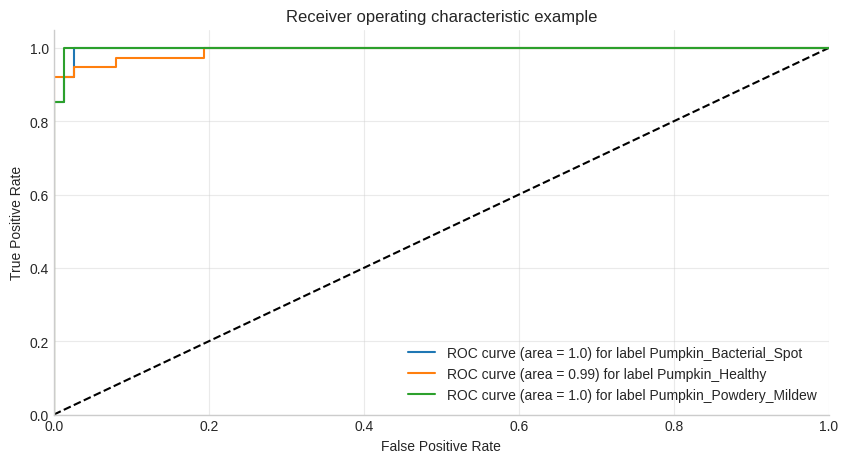

In [9]:


model.evaluate(test_generator,steps=test_generator.n//batch_size)
test_generator.reset()

y_pred=model.predict(test_generator,steps=test_generator.n/batch_size,verbose=1)
class_label=list(test_generator.class_indices.keys())


if val_suffle==True:
  per = np.random.permutation(test_generator.n)
  test_generator.index_array = per
  y_true = test_generator.classes[per]
else:
  y_true = test_generator.classes


plot_multiclass_roc( y_pred, pd.get_dummies(y_true), n_classes=3,class_label=class_label, figsize=(10, 5))

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

score = model.evaluate_generator(test_generator, verbose=1)
test_generator.reset()
predictions = model.predict_generator(test_generator, steps=len(test_generator))
y = np.argmax(predictions, axis=1)

print('Classification Report')
cr = classification_report(y_true=test_generator.classes, y_pred=y, target_names=test_generator.class_indices)
print(cr)

<ipython-input-10-6c09e5750d7e>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, verbose=1)


8/8 [==============================] - 9s 1s/step - loss: 0.1567 - accuracy: 0.9467


<ipython-input-10-6c09e5750d7e>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=len(test_generator))


Classification Report
                        precision    recall  f1-score   support

Pumpkin_Bacterial_Spot       0.95      0.92      0.93        75
       Pumpkin_Healthy       0.95      0.92      0.93        75
Pumpkin_Powdery_Mildew       0.95      1.00      0.97        75

              accuracy                           0.95       225
             macro avg       0.95      0.95      0.95       225
          weighted avg       0.95      0.95      0.95       225



8/8 [==============================] - 9s 1s/step


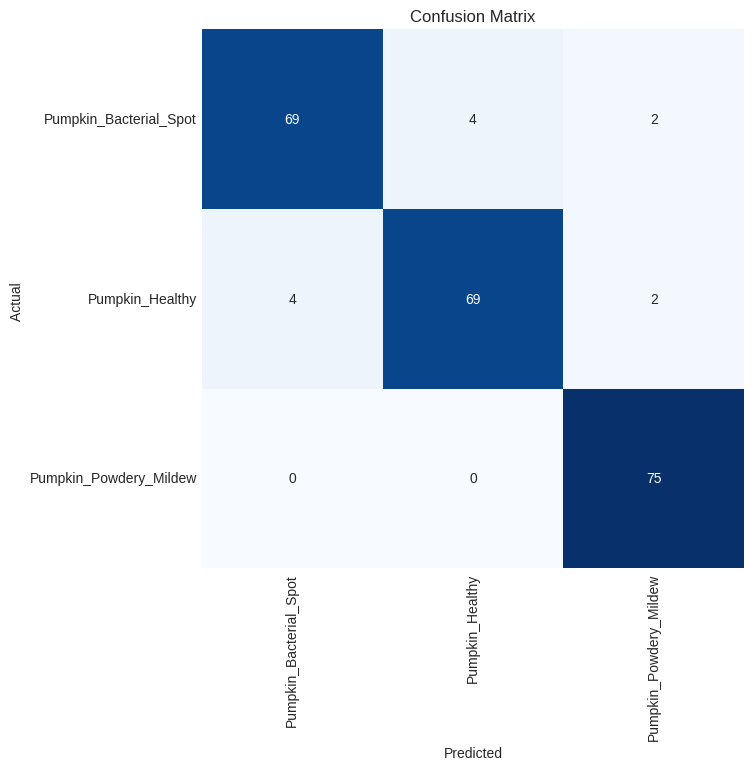

In [11]:
classes = 3
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Removed duplicate class name
classes=['Pumpkin_Bacterial_Spot', 'Pumpkin_Healthy','Pumpkin_Powdery_Mildew']
preds=model.predict(test_generator)
y_pred=[]
y_true=[]
for i, p in enumerate(preds):
    y_pred.append(np.argmax(p))
    y_true.append(test_generator.labels[i])
y_pred=np.array(y_pred)
y_true=np.array(y_true)
cm = confusion_matrix(y_true, y_pred )
clr = classification_report(y_true, y_pred, target_names=classes) # Now the number of classes and target_names should match
length=len(classes)
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(length)+.5, classes, rotation= 90)
plt.yticks(np.arange(length)+.5, classes, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual ")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Example prediction
test_image_path = '/path/to/test/image.jpg'
img = tf.keras.preprocessing.image.load_img(test_image_path, target_size=image_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Expand dimensions to create batch of size 1
img_array /= 255.  # Normalize the image
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Print predicted class or use for further processing
print(f'Predicted class: {predicted_class}')


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from vit_keras import vit
from sklearn.metrics import accuracy_score

# Function to load ViT-B/16 model
def load_vit_b16_model(weights_path):
    vit_b16_model = vit.vit_b16(image_size=(224, 224), activation='softmax', pretrained=True)
    vit_b16_model.load_weights(weights_path)
    return vit_b16_model

# Function to load ViT-L/16 model
def load_vit_l16_model(weights_path):
    vit_l16_model = vit.vit_l16(image_size=(224, 224), activation='softmax', pretrained=True)
    vit_l16_model.load_weights(weights_path)
    return vit_l16_model

# Paths to the saved weights
vit_b16_weights_path = 'path_to_vit_b16_weights.h5'  # Replace with actual path
vit_l16_weights_path = 'path_to_vit_l16_weights.h5'  # Replace with actual path

# Load ViT-B/16 and ViT-L/16 models
vit_b16_model = load_vit_b16_model(vit_b16_weights_path)
vit_l16_model = load_vit_l16_model(vit_l16_weights_path)

# Data paths
train_dir = '/content/drive/MyDrive/Labled_Pumpkin_dataset/Training'
valid_dir = '/content/drive/MyDrive/Labled_Pumpkin_dataset/Validation'


# Define data generators for training and validation data
batch_size = 32
image_size = (224, 224)

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No need to shuffle validation data
)

# Make predictions on validation data with ViT-B/16 and ViT-L/16 models
predictions_b16 = vit_b16_model.predict(valid_generator)
predictions_l16 = vit_l16_model.predict(valid_generator)

# Ensemble averaging
ensemble_pred = (predictions_b16 + predictions_l16) / 2.0
ensemble_labels = np.argmax(ensemble_pred, axis=1)

# Get true labels from generator
true_labels = valid_generator.classes

# Calculate accuracy
accuracy = accuracy_score(true_labels, ensemble_labels)
print(f"Ensemble Accuracy on Validation Set: {accuracy:.4f}")


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from vit_keras import vit

# Function to load ViT-B/16 model
def load_vit_b16_model(weights_path):
    vit_b16_model = vit.vit_b16(image_size=(224, 224), activation='softmax', pretrained=True)
    vit_b16_model.load_weights(weights_path)
    return vit_b16_model

# Function to load ViT-L/16 model
def load_vit_l16_model(weights_path):
    vit_l16_model = vit.vit_l16(image_size=(224, 224), activation='softmax', pretrained=True)
    vit_l16_model.load_weights(weights_path)
    return vit_l16_model

# Paths to the saved weights
vit_b16_weights_path = 'path_to_vit_b16_weights.h5'  # Replace with actual path
vit_l16_weights_path = 'path_to_vit_l16_weights.h5'  # Replace with actual path

# Load ViT-B/16 and ViT-L/16 models
vit_b16_model = load_vit_b16_model(vit_b16_weights_path)
vit_l16_model = load_vit_l16_model(vit_l16_weights_path)

# Data paths
train_dir = '/content/drive/MyDrive/Pumpkin data/Training'
valid_dir = '/content/drive/MyDrive/Pumpkin data/Validation'

# Define data generators for training and validation data
batch_size = 32
image_size = (224, 224)

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No need to shuffle validation data
)

# Make predictions on validation data with ViT-B/16 and ViT-L/16 models
predictions_b16 = vit_b16_model.predict(valid_generator)
predictions_l16 = vit_l16_model.predict(valid_generator)

# Ensemble averaging
ensemble_pred = (predictions_b16 + predictions_l16) / 2.0
ensemble_labels = np.argmax(ensemble_pred, axis=1)

# Get true labels from generator
true_labels = valid_generator.classes

# Evaluate performance (optional)
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(true_labels, ensemble_labels, target_names=train_generator.class_indices.keys()))
